In [138]:
import numpy as np
import pandas as pd

In [139]:
file = 'data/1km_data.csv'

df = pd.read_csv(file)

In [140]:
print("shape:", df.shape)
print("columns:", df.columns)
print("longitude range:", df['long'].min(), df['long'].max())
print("latitude range:", df['lat'].min(), df['lat'].max())
print("elevation range:", df['elevation'].min(), df['elevation'].max())
print("temperature range:", df['generated_temp'].min(), df['generated_temp'].max())

shape: (1273630, 4)
columns: Index(['elevation', 'long', 'lat', 'generated_temp'], dtype='object')
longitude range: 145.6932643549246 153.46369156255847
latitude range: -38.45238573673612 -23.43255418625772
elevation range: -44.925156 2135.8901
temperature range: 4.923469107634504 19.900859744578675


In [141]:
lat_row_1 = df.loc[df['lat'] == -37.72475035659931]
lat_row_2 = df.loc[df['lat'] == -35.77540619005995]
lat_row_3 = df.loc[df['lat'] == -38.45238573673612]

print(lat_row_1.shape)
print(lat_row_2.shape)
print(lat_row_3.shape)

(591, 4)
(591, 4)
(258, 4)


In [142]:
print(len(df['lat'].unique()))
print(len(df['long'].unique()))

1673
866


# want to turn it into 1600 x 800 then 50 x 25 = 1250 data points?

In [143]:
# truncate dataset to get rid of lowest 73 latitude and 66 highest longitude
ordered_lats = np.sort(df['lat'].unique())
truncated_lats = ordered_lats[73:]
print(len(truncated_lats))

ordered_longs = np.sort(df['long'].unique())
truncated_longs = ordered_longs[:-66]
print(len(truncated_longs))

truncated_df = df.loc[df['lat'].isin(truncated_lats) & df['long'].isin(truncated_longs)]
print(truncated_df.shape)
print(1600*800)

1600
800
(1187162, 4)
1280000


In [144]:
# 1600 x 800 -> 50 x 25:
lat_groups = truncated_lats[31::32]
long_groups = truncated_longs[31::32]
assert (lat_groups[-1] == truncated_lats[-1])
assert (long_groups[-1] == truncated_longs[-1])

print(f'truncated lats min, max:', (min(truncated_lats), max(truncated_lats)))
print(f'truncated longs min, max:', (min(truncated_longs), max(truncated_longs)), '\n')

print(truncated_lats[31])
print(truncated_longs[31], '\n')

print(lat_groups[0], lat_groups[-1])
print(long_groups[0], long_groups[-1], '\n')

print(len(lat_groups))
print(len(long_groups))

truncated lats min, max: (-37.79661557932887, -23.43255418625772)
truncated longs min, max: (145.6932643549246, 152.87080347503957) 

-37.51813784125181
145.97174209300167 

-37.51813784125181 -23.43255418625772
145.97174209300167 152.87080347503957 

50
25


In [145]:
print(32*32)
copy_df = truncated_df.copy()
square_sizes = []

for i, lat_lim in enumerate(lat_groups):
    prev_lat = lat_groups[i-1] if i > 0 else truncated_lats[0]
    for j, long_lim in enumerate(long_groups):
        prev_long = long_groups[j-1] if j > 0 else truncated_longs[0]

        square = copy_df.loc[
            (copy_df['lat'] >= prev_lat) & 
            (copy_df['lat'] <= lat_lim) & 
            (copy_df['long'] >= prev_long) & 
            (copy_df['long'] <= long_lim)
        ]
        size = square.shape[0]
        square_sizes.append(size)
        copy_df = copy_df.drop(square.index)

print(square_sizes)
print(len(square_sizes))
print(sum(square_sizes))
print(max(square_sizes))


1024


[1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 480, 0, 0, 0, 0, 0, 0, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 480, 0, 0, 0, 0, 0, 0, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 480, 0, 0, 0, 0, 0, 0, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 480, 0, 0, 0, 0, 0, 0, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 480, 0, 0, 0, 0, 0, 0, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 480, 0, 0, 0, 0, 0, 0, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 480, 0, 0, 0, 0, 0, 0, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024

In [146]:
copy_df = truncated_df.copy()
reduced_df = pd.DataFrame()

for i, lat_lim in enumerate(lat_groups):
    prev_lat = lat_groups[i-1] if i > 0 else truncated_lats[0]
    for j, long_lim in enumerate(long_groups):
        prev_long = long_groups[j-1] if j > 0 else truncated_longs[0]

        square = copy_df.loc[
            (copy_df['lat'] >= prev_lat) & 
            (copy_df['lat'] <= lat_lim) & 
            (copy_df['long'] >= prev_long) & 
            (copy_df['long'] <= long_lim)
        ]

        new_pt = {
            'lat': (prev_lat + lat_lim) / 2,
            'long': (prev_long + long_lim) / 2,
        }

        if square.shape[0] == 0: # no data points = off the coast sea level
            # at sea level
            new_pt['elevation'] = 0
            new_pt['generated_temp'] = 19 + np.random.normal(0, 0.2) # same formula as in edit_temp_data.ipynb
        else:
            new_pt['elevation'] = square['elevation'].mean()
            new_pt['generated_temp'] = square['generated_temp'].mean()
            # is there a better way to interpolate temperature and elevation?
        
        reduced_df = pd.concat([reduced_df, pd.DataFrame([new_pt])], ignore_index=True)

        copy_df = copy_df.drop(square.index)

print(reduced_df.shape)
print(reduced_df.head())
print(reduced_df['lat'].min(), reduced_df['lat'].max())
print(reduced_df['long'].min(), reduced_df['long'].max())
print(reduced_df['elevation'].min(), reduced_df['elevation'].max())
print(reduced_df['generated_temp'].min(), reduced_df['generated_temp'].max())

(1250, 4)
         lat        long   elevation  generated_temp
0 -37.657377  145.832503  662.120711       14.695870
1 -37.657377  146.115473  894.740107       13.178485
2 -37.657377  146.402933  847.891958       13.487634
3 -37.657377  146.690394  567.229514       15.301900
4 -37.657377  146.977855  476.709221       15.911354
-37.657376710290336 -23.57628463171684
145.83250322396313 152.72707302958045
0.0 1570.4010564453124
8.777958836524835 19.441583044082638


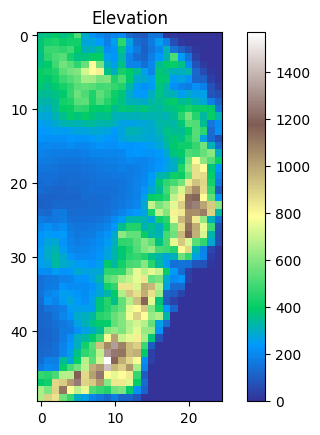

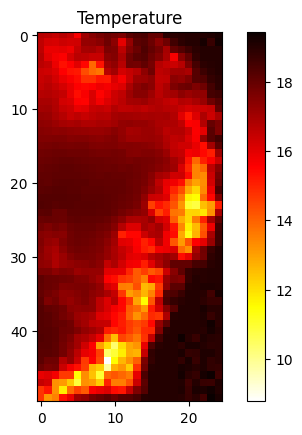

In [175]:
# plot a 50 x 25 grid of the reduced data
import matplotlib.pyplot as plt

asc_longs = np.sort(reduced_df['long'].unique())
desc_lats = np.sort(reduced_df['lat'].unique())[::-1]

temp_grid = []
alt_grid = []

for lat in desc_lats:
    temp_row = []
    alt_row = []
    for long in asc_longs:
        point = reduced_df.loc[(reduced_df['lat'] == lat) & (reduced_df['long'] == long)]
        temp_row.append(point['generated_temp'].values[0])
        alt_row.append(point['elevation'].values[0])
    temp_grid.append(temp_row)
    alt_grid.append(alt_row)

plt.figure(1)
plt.imshow(alt_grid, cmap='terrain', interpolation='nearest')
plt.colorbar()
plt.title('Elevation')
plt.show()

plt.figure(2)
plt.imshow(temp_grid, cmap='hot_r', interpolation='nearest')
plt.colorbar()
plt.title('Temperature')
plt.show()

In [177]:
reduced_data_file = 'data/50x25_data.csv'
reduced_df.to_csv(reduced_data_file, index=False)